# Weather station data over Asia

## Summary 

This notebook presents exploratory work on scaling up our current signals to regions outside the US and Europe, with a particular focus on Asia. The task involves identifying daily weather station data across Asia, either in the form of individual station records or gridded observational products. 

Preliminary analysis suggests that a range of daily gridded products are available over Asia, although the availability of data varies strongly between variables of interest (precipitation, temperature and wind speed). Multiple daily precipitation products are available for us to download and explore. Several maximum temperature products are also available, which will undoubtedly improve our signal coverage. However, wind speed data are lacking, and this issue will need to be investigated further going forward. All datasets found so far are listed and summarised in [this document](https://docs.google.com/document/d/1iAmaexLFHQpimrtQ2me5qPjmI79k5vz9pAnhQH1LxgU/edit). Some initial plots of selected datasets are shown below for daily precipitation and maximum temperature. 

**Example: Asian Precipitation-Highly Resolved Observational Data Integration Towards Evaluation of the Water Resources (APHRODITE)**

The [APHRODITE](https://journals.ametsoc.org/view/journals/bams/93/9/bams-d-11-00122.1.xml) dataset contains daily precipitation amount data derived from a network station gauges, with a horizontal grid spacing of 0.25º. It covers the period from January 1951 to December 2015, over the region shown in Fig. 2.  

In [94]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean

In [127]:
# read in netCDF data
input = '/data/temporary/sam/APHRO_MA_025deg_V1101*.nc'

In [139]:
# open files and select precipitation
aphrodite = xr.open_mfdataset(input,combine='by_coords')
prcp = aphrodite.precip

**Inspect the input file for missing data**

In [140]:
# find missing data, if it exists
# for all land points, determine whether data are missing (NaN)

/home/samhardy/.cache/pypoetry/virtualenvs/ds-climate-signals-cParcSAt-py3.8/lib/python3.8/site-packages/xarray/core/common.py:1105: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/samhardy/.cache/pypoetry/virtualenvs/ds-climate-signals-cParcSAt-py3.8/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


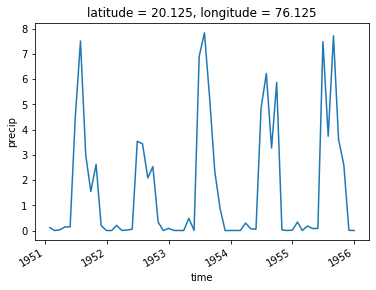

In [143]:
# plot time series for chosen location
monthly_mean = prcp.resample(time="1M", skipna=False).mean()
monthly_mean.sel(latitude=20,method="nearest").sel(longitude=76,method="nearest").plot()

**Plot daily precipitation over entire APHRODITE domain**

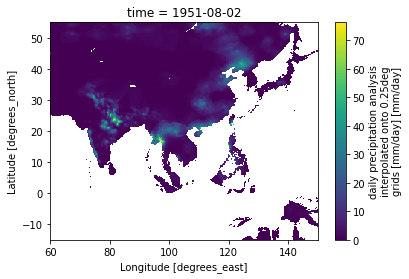

In [121]:
#concentrate on single day 
prcp.sel(time='1951-08-02T00:00:00').plot()

**Plot daily precipitation over India**

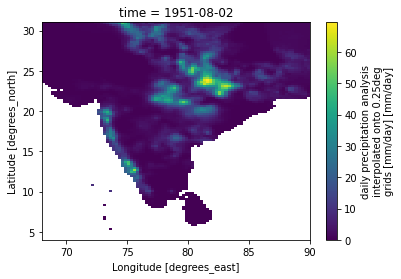

In [103]:
# customise plot area to focus on India
prcp.sel(time='1951-08-02T00:00:00',latitude=slice(4,31),longitude=slice(68,90)).plot()

**Example: Berkeley Earth Surface Temperature (BEST) gridded maximum temperature data**

The [BEST](http://berkeleyearth.org/data/) dataset contains mean, maximum and minimum temperature data derived from a global network of stations, with a horizontal grid spacing of 1º (0.25º over the US and Europe). I have only downloaded a subset of the dataset for now (2010-2019), but download and analysis of other decades should be quick and trivial.

In [151]:
# read in netCDF data
input_tmax = '/data/temporary/sam/BEST_2010_2019.nc'

In [157]:
# open file
earth_sfc_tmax = xr.open_dataset(input_tmax)
tmax = earth_sfc_tmax.temperature

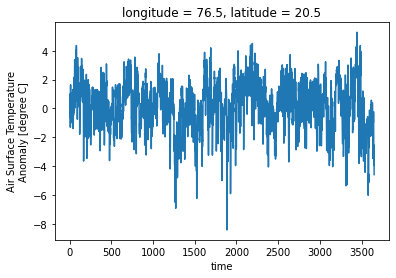

In [159]:
# plot time series for chosen location (same as for precipitation)
#monthly_mean = tmax.resample(time="1M", skipna=False).mean()
tmax.sel(latitude=20,method="nearest").sel(longitude=76,method="nearest").plot()

On first inspection, the air temperature data appear to represent anomalies rather than raw values. I'm currently digging deeper to make sure I've not downloaded the wrong dataset. The time dimension also needs metadata assigned to it. 

## Immediate next steps 

* Download remaining data for APHRODITE (1951-2015) and BEST (1880-present). 
* Inspect other datasets for precipitation and temperature, including: 

    1. Precipitation Estimation from Remotely Sensed Information using Artificial Neural Networks - Climate Data Record (PERSIANN-CDR). This daily gridded rainfall product (1983-present) is available on a 0.25º x 0.25º regular latitude-longitude grid, between 60ºN and 60ºS, and can be downloaded [here](https://www.ncei.noaa.gov/products/climate-data-records/precipitation-persiann).
    2. [Southeast Asian Climate Assessment and Dataset](https://sacad.database.bmkg.go.id/). This daily dataset (1981-2014) is available on both 0.25º x 0.25º and 0.5º x 0.5º regularly spaced grids was compiled using station data across Southeast Asia, with 1393 precipitation and 365 maximum temperature stations. Countries covered include Vietnam, Thailand, Malaysia, Indonesia, Singapore, the Philippines and Australia. Details are discussed further in this [paper](https://journals.ametsoc.org/view/journals/clim/30/14/jcli-d-16-0575.1.xml?tab_body=pdf).
    3. The APHRO_JP gridded rainfall product was developed as part of the APHRODITE project, and provides high-resolution (0.05º x 0.05º) daily precipitation data over Japan, between 1900 and 2011. The details are discussed further in this [paper](https://www.jstage.jst.go.jp/article/hrl/4/0/4_0_60/_article/-char/ja/).
    4. [Daily station data](http://www.weather.gov.sg/climate-historical-daily/ ) over Singapore, going back to 1980. There are 60 stations with usable (> 10 years) daily precipitation amount data, and 21 stations with usable (> 10 years) maximum temperature, maximum wind speed and mean wind speed data. Although only covering a small area, these stations would provide high-resolution coverage in a region of potential interest. 
    
 
* Determine the amount of missing data in all datasets, primarily APHRODITE (1951-2015) and BEST (1880-present), and document any other issues that could increase the amount of time we spend analysing the data (e.g. end-of-day measurement time, differences in bias correction method). 
* Decide how we go about downloading datasets that state they are meant for non-commercial use (this may be simple, I'm just unfamiliar). 
* Continue looking for additional, higher-resolution and more comprehensive datasets.